# Finite Time Lyapunov Exponent (FTLE) analysis
### Author: Justine John (JJ) A. Serdoncillo 
### Date Created: July 28, 2023
---


# <font color='289C4E'>Table of contents<font><a class='anchor' id='top'></a>
1. [Uploading background data](#1)
2. [Uploading particle data](#2)
3. [Individual Visualization](#3)
4. [Flow Map](#4)
5. [FTLE Field](#5)
6. [Save Data](#6)

## Simulation data for two-dimensional flow around a pitching NACA0015 airfoil at $Re = 1000$

### Airfoil kinematics: $\theta = \theta_0 + \Delta \theta sin(2\pi f^*t)$, where $f^* = 0.15$, $\Delta \theta = 25^{\circ}$, $\theta_0 = 15^{\circ}$.
***
***

## <font color='289C4E'>Uploading background data<font><a id='1'></a>

In [1]:
using FileIO, ImageMagick, Colors, FixedPointNumbers, DelimitedFiles, PyPlot, LinearAlgebra, HDF5

### Upload velocity, airfoil position and vorticity contours

In [2]:
data =  "C:/Users/jjser/Desktop/Julia_FTLE_Karthik_Data/airfoil2D_f0.15_amp25deg_KM/data_JJ"
name =  "xR.h"
x_range = h5open(joinpath(data,name), "r") do file
    read(file, "A")
end
name =  "yR.h"
y_range = h5open(joinpath(data,name), "r") do file
    read(file, "A")
end
name = "VelData.h"
vel = h5open(joinpath(data,name), "r") do file
    read(file, "A")
end
name =  "BvoData.h"
bvo = h5open(joinpath(data,name), "r") do file
    read(file, "A")
end
print("DONE")

DONE

## <font color='289C4E'>Uploading particle data<font><a id='2'></a>

### Upload particle position and FTLE data

In [3]:
name = "p500.h" 
p500 = h5open(joinpath(data,name), "r") do file
    read(file, "A")
end
name = "n500.h"
n500 = h5open(joinpath(data,name), "r") do file
    read(file, "A")
end
print("DONE")

DONE

<div class="alert alert-block alert-success">  
These will have 122 timesteps
</div>

## <font color='289C4E'>Individual Visualization<font><a id='3'></a>

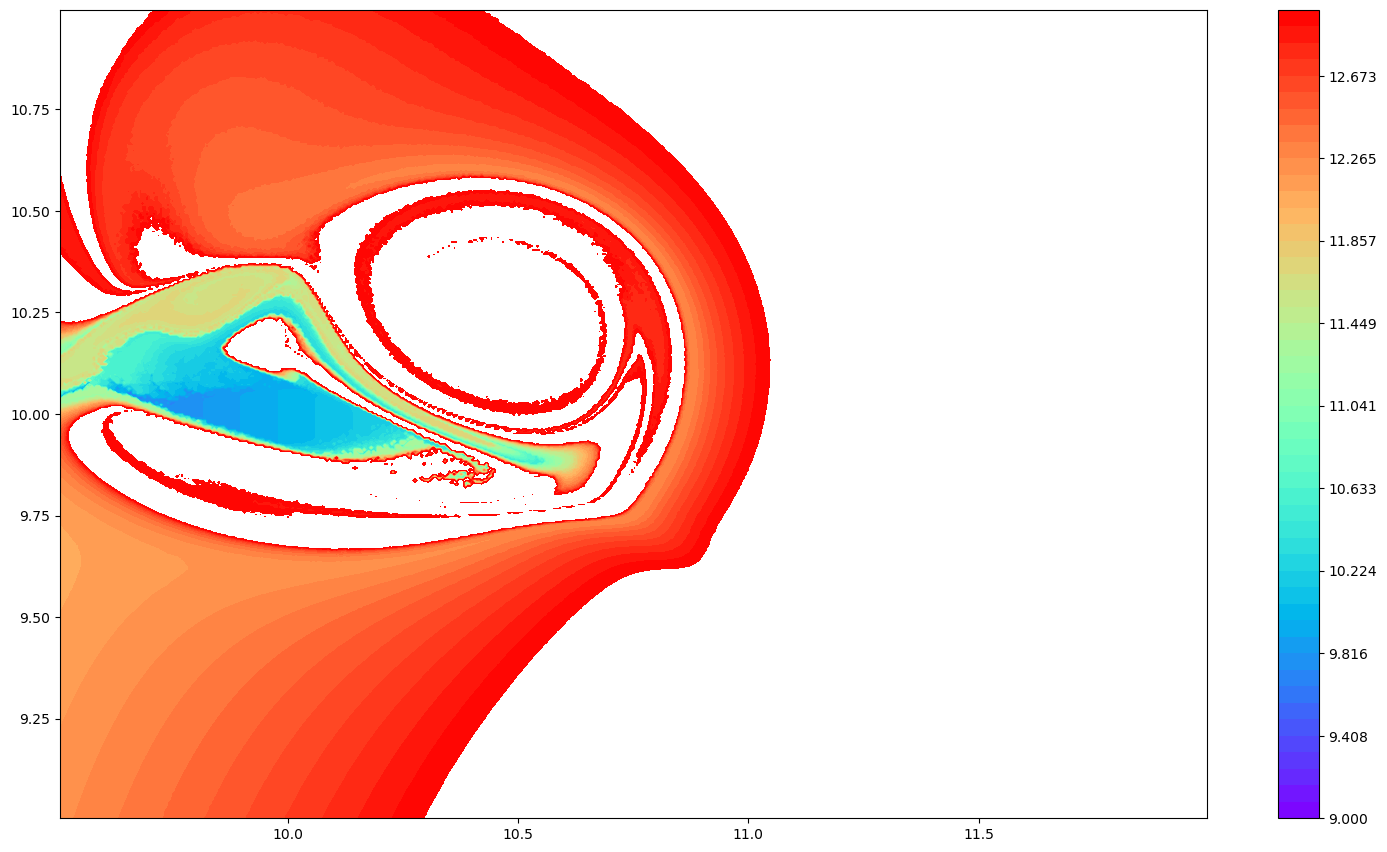

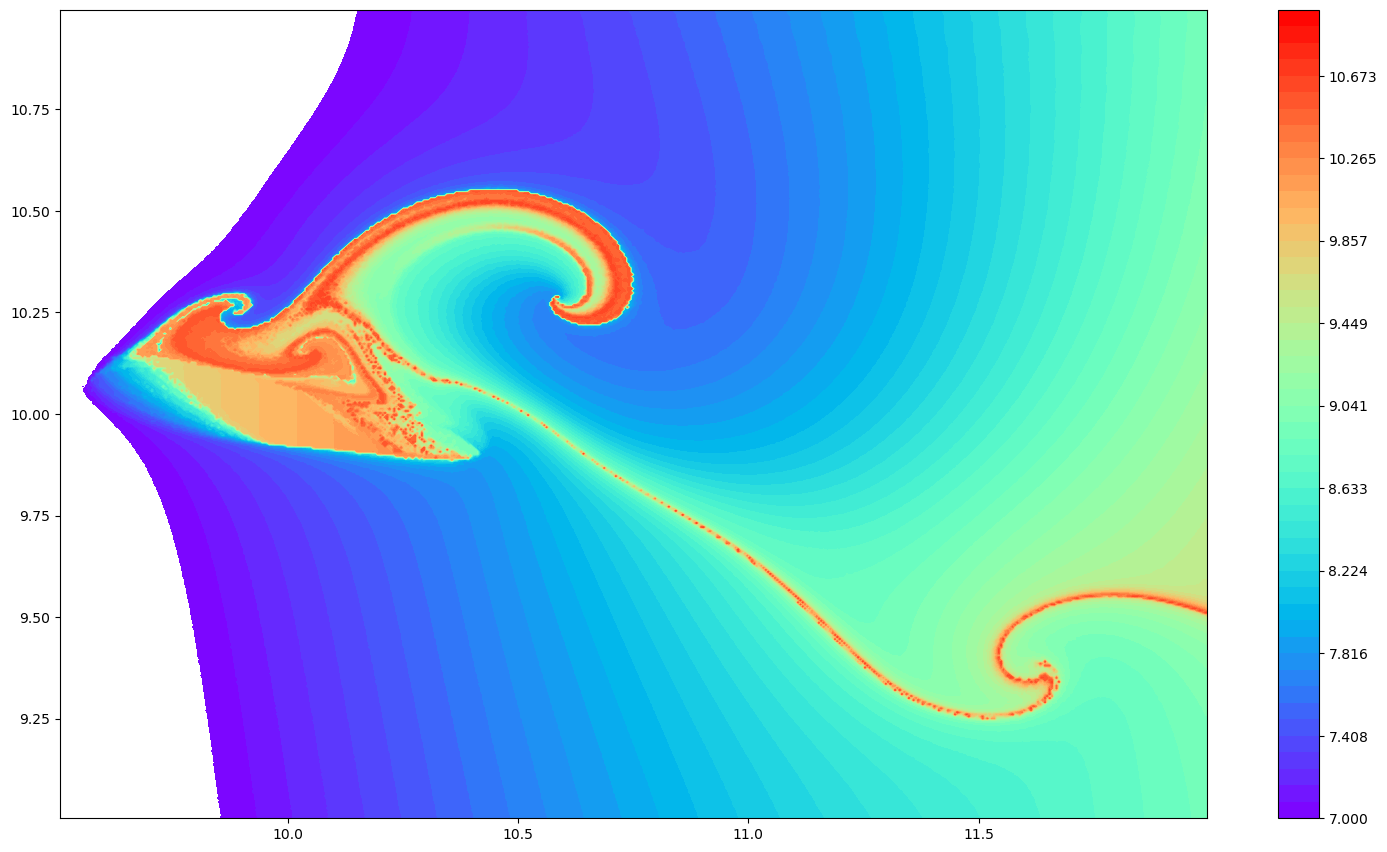

In [6]:
fm(p500,61,range(9,13,length=50))
fm(n500,61,range(7,11,length=50))

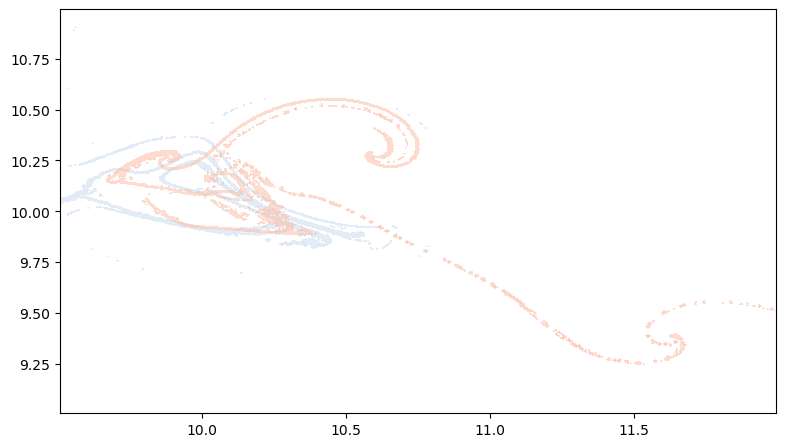

PyObject <matplotlib.contour.QuadContourSet object at 0x0000017D2B00B040>

In [7]:
ftle(p500, n500, 0.8, 122)

## Plotting figures

## <font color='289C4E'>Flow Map<font><a id='4'></a>

### Plot flow map at a certain time step

In [8]:
function fm(o, t, levels, save=false)
    fig, ax = subplots(figsize=(18.5,10.5))
    cm = ax.contourf(o[1,1,:,:],o[2,1,:,:],o[1,t,:,:], cmap=ColorMap("rainbow"), levels=levels)
    fig.colorbar(cm)
    #title("Flow Map at "*string(move*(t-1)*tstep_delta+t_0) *"ms")
    if save == true
        savefig(joinpath(data, name * string(t) * ".png"), dpi=100)
        close()
    end
end

fm (generic function with 2 methods)

## <font color='289C4E'>FTLE Field<font><a id='5'></a>

### Plot FTLE field for both forward and backward time at a certain timestep

In [50]:
function ftle(p, n, lim, ts, save, t, tar)
    x = p[1,1,:,:]
    y = p[2,1,:,:]
    pos = (p[3,ts,:,:] .> lim * maximum(p[3,ts,:,:])) .|> Int
    neg = (n[3,ts,:,:] .> lim * maximum(n[3,ts,:,:])) .|> Int
    fig, ax = subplots(figsize=(18.5,10.5))
    levels = range(0, 1,length=3) .+ 0.5
    ax.contourf(x,y,pos,cmap=ColorMap("Blues"),levels=levels, alpha=0.5, zorder=1)
    ax.contourf(x,y,neg,cmap=ColorMap("Reds") ,levels=levels, alpha=0.5, zorder=2)
    if save == true
        name = string(t) * "_" * string(tar) * ".png"
        savefig(joinpath(sdata, name), dpi=100)
        close()
    end
end

ftle (generic function with 3 methods)

## <font color='289C4E'>Saving Data<font><a id='6'></a>

#### Save FTLE fields

In [51]:
data =  "C:/Users/jjser/Desktop/Julia_FTLE_Karthik_Data/airfoil2D_f0.15_amp25deg_KM/data_JJ"
sdata =  "C:/Users/jjser/Desktop/Julia_FTLE_Karthik_Data/airfoil2D_f0.15_amp25deg_KM/plots_JJ/69800_3000_250"
t = 69800
d = 200
r = 6000
n = Int(0.5*r/d)
for ii in -n:n 
    tar = t + ii * d
    name = "p" * string(t) * "_" * string(tar) * ".h"
    p = h5open(joinpath(data,name), "r") do file
        read(file, "A")
    end
    name = "n" * string(t) * "_" * string(tar) * ".h"
    n = h5open(joinpath(data,name), "r") do file
        read(file, "A")
    end
    ftle(p, n, 0.8, 122, true, t, tar)
end
print("DONE")

DONE

#### Save as gif

In [52]:
gif_arr = ones(RGB{N0f8}, (1050, 1850, 31)) 
sdata =  "C:/Users/jjser/Desktop/Julia_FTLE_Karthik_Data/airfoil2D_f0.15_amp25deg_KM/plots_JJ/69800_3000_250"
t = 69800
d = 200
r = 6000
n = Int(0.5*r/d)

for frame in 1:31
    ii = -n + frame -1
    tar = t + ii * d
    name = string(t) * "_" * string(tar) * ".png"
    im = load(joinpath(sdata, name))
    gif_arr[:,:,frame] = im
end

name = "69800_3000_250gif.gif"
save(joinpath(sdata, name), gif_arr)
print("DONE")

DONE